In [1]:
import pandas as pd

In [2]:
data1 =pd.read_csv("bballPlayers.csv")

In [3]:
data2=pd.read_csv("bballStats.csv")

In [4]:
#data1.head()
#data1.describe()

In [5]:
data2.shape

(4587, 38)

In [6]:
#data3= pd.read_csv("bballStats.txt")

In [7]:
 f = open("bballStats.txt", "r")
 data = f.readlines()

In [8]:
#create a list using delimiter ,
with open('bballStats.txt') as f:
    lines = [line.rstrip() for line in f]

In [9]:
needs_cleaning = lines.pop(3288)
lines[0]

'playerID,GP,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,PostGP,PostGS,PostMinutes,PostPoints,PostoRebounds,PostdRebounds,PostRebounds,PostAssists,PostSteals,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note,year'

In [10]:
needs_cleaning

'hardaan01,4,72,10,0,10,10,8,2,0,6,7,14,4,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,2005harrial01,76,2782,1411,132,391,523,238,85,14,195,301,1220,551,350,243,191,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,2005'

In [11]:
lines[1]

'abdulma02,67,1505,942,34,87,121,206,55,4,110,149,1009,417,98,84,100,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,1990'

In [12]:
38*2

76

In [13]:
needs_cleaning=needs_cleaning.replace("2005harrial01","2005,harrial01")

In [14]:
needs_cleaning[0:90]

'hardaan01,4,72,10,0,10,10,8,2,0,6,7,14,4,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,2005'

In [15]:
needs_cleaning[91:]

'harrial01,76,2782,1411,132,391,523,238,85,14,195,301,1220,551,350,243,191,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,2005'

In [16]:
lines.append(needs_cleaning[0:90])
lines.append(needs_cleaning[91:])

In [17]:
required_data=pd.DataFrame(lines)
required_data.head()

,0
0,"playerID,GP,minutes,points,oRebounds,dRebounds..."
1,"abdulma02,67,1505,942,34,87,121,206,55,4,110,1..."
2,"adamsmi01,66,2346,1752,58,198,256,693,147,6,24..."
3,"aguirma01,78,2006,1104,134,240,374,139,47,20,1..."
4,"aingeda01,80,1710,890,45,160,205,285,63,13,100..."


In [18]:
lines_list=[]
for line in lines:
    lines_list.append(line.split(","))

In [19]:
lines_data = pd.DataFrame(lines_list[1:],columns=lines_list[0])
lines_data.shape

(4587, 38)

In [20]:
reqPos=["G", "G-F", "F-G", "F", "F-C", "C-F", "C"]

In [21]:

lines_data.dtypes

playerID              object
GP                    object
minutes               object
points                object
oRebounds             object
dRebounds             object
rebounds              object
assists               object
steals                object
blocks                object
turnovers             object
PF                    object
fgAttempted           object
fgMade                object
ftAttempted           object
ftMade                object
threeAttempted        object
threeMade             object
PostGP                object
PostGS                object
PostMinutes           object
PostPoints            object
PostoRebounds         object
PostdRebounds         object
PostRebounds          object
PostAssists           object
PostSteals            object
PostBlocks            object
PostTurnovers         object
PostPF                object
PostfgAttempted       object
PostfgMade            object
PostftAttempted       object
PostftMade            object
PostthreeAttem

In [22]:
#surveys_df[surveys_df.year == 2002]
reqData=pd.DataFrame()

def reqPosdata(data , strArray , colName):
    for i in range(len(strArray)):
        reqdatasubset = data[data[colName]==strArray[i]]
        #print(reqdatasubset)
        if i == 0:
            reqData=reqdatasubset
        else:
            reqData = reqData.append(reqdatasubset)
            
    return(reqData)


subsettedData = reqPosdata(data = data1,strArray=reqPos,colName = "pos" )
subsettedData.shape

(1167, 5)

In [23]:
data1.shape

(1250, 5)

In [24]:
#problem 2

In [25]:
reqCols=["playerID","GP","minutes","points","oRebounds","dRebounds","rebounds","steals","blocks","turnovers", "PF","fgAttempted","fgMade","ftAttempted","ftMade","threeAttempted","threeMade","year"]   
bballStats=data2[reqCols]
bballStats.head()

,playerID,GP,minutes,points,oRebounds,dRebounds,rebounds,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,year
0,abdulma02,67,1505,942,34,87,121,55,4,110,149,1009,417,98,84,100,24,1990
1,adamsmi01,66,2346,1752,58,198,256,147,6,240,162,1421,560,529,465,564,167,1990
2,aguirma01,78,2006,1104,134,240,374,47,20,128,209,909,420,317,240,78,24,1990
3,aingeda01,80,1710,890,45,160,205,63,13,100,195,714,337,138,114,251,102,1990
4,andergr01,26,247,70,26,49,75,8,9,22,29,73,27,28,16,1,0,1990


In [26]:
bballStats=bballStats.drop("year",axis=1)
bballStats.head()

,playerID,GP,minutes,points,oRebounds,dRebounds,rebounds,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
0,abdulma02,67,1505,942,34,87,121,55,4,110,149,1009,417,98,84,100,24
1,adamsmi01,66,2346,1752,58,198,256,147,6,240,162,1421,560,529,465,564,167
2,aguirma01,78,2006,1104,134,240,374,47,20,128,209,909,420,317,240,78,24
3,aingeda01,80,1710,890,45,160,205,63,13,100,195,714,337,138,114,251,102
4,andergr01,26,247,70,26,49,75,8,9,22,29,73,27,28,16,1,0


In [27]:
bballStats_grouped = bballStats.groupby(['playerID']).sum()

In [28]:
totalData = pd.merge(data1,bballStats,on="playerID")

In [29]:
totalData.head()

,playerID,name,pos,height,weight,GP,minutes,points,oRebounds,dRebounds,...,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
0,abdulma02,Mahmoud Abdul-Rauf,G,73.0,162.0,67,1505,942,34,87,...,55,4,110,149,1009,417,98,84,100,24
1,abdulma02,Mahmoud Abdul-Rauf,G,73.0,162.0,81,1538,837,22,92,...,44,4,117,130,845,356,108,94,94,31
2,abdulma02,Mahmoud Abdul-Rauf,G,73.0,162.0,81,2710,1553,51,174,...,84,8,187,179,1407,633,232,217,197,70
3,abdulma02,Mahmoud Abdul-Rauf,G,73.0,162.0,80,2617,1437,27,141,...,82,10,151,150,1279,588,229,219,133,42
4,abdulma02,Mahmoud Abdul-Rauf,G,73.0,162.0,73,2082,1165,32,105,...,77,9,119,126,1005,472,156,138,215,83


In [30]:
#Problem 3

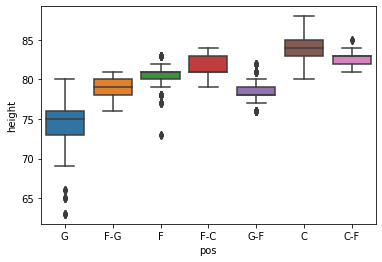

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="pos", y="height", data=totalData)

In [32]:

def normalize(x):
    return (x-x.mean())/ x.std()


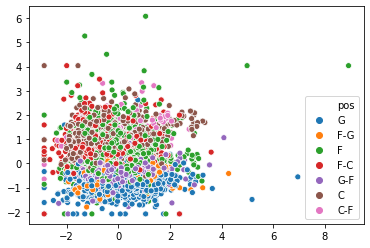

In [33]:
x_points = normalize(totalData["points"]/totalData["minutes"])
y_points = normalize(totalData["rebounds"]/totalData["minutes"])
sns.scatterplot(x=x_points, y=y_points, hue=totalData["pos"])

In [34]:
#reqCols=["minutes","points","oRebounds","dRebounds","rebounds","steals","blocks","turnovers",
#        "PF","fgAttempted","fgMade","ftAttempted","ftMade","threeAttempted","threeMade"]   

normCols = ['height', 'weight', 'minutes', 'points', 'oRebounds', 'dRebounds', 
            'rebounds', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 
            'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade']

totalData[normCols] = totalData[normCols].apply(normalize, axis=0)

In [35]:
totalData.head()

,playerID,name,pos,height,weight,GP,minutes,points,oRebounds,dRebounds,...,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
0,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,67,0.244209,0.903015,-0.458381,-0.485275,...,0.366312,-0.596390,0.519759,0.415934,1.566307,1.271621,-0.258836,-0.154580,0.198020,-0.086479
1,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,81,0.279756,0.679236,-0.640292,-0.449556,...,0.066207,-0.596390,0.627802,0.174047,1.124356,0.922138,-0.186662,-0.061115,0.144321,0.078837
2,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,81,1.542212,2.205200,-0.200674,0.136231,...,1.157500,-0.487007,1.708226,0.797862,2.638845,2.509137,0.708295,1.088504,1.066152,0.999880
3,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,80,1.442034,1.957977,-0.564496,-0.099513,...,1.102935,-0.432315,1.152579,0.428665,2.293908,2.251321,0.686643,1.107197,0.493364,0.338618
4,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,73,0.865742,1.378281,-0.488700,-0.356688,...,0.966523,-0.459661,0.658671,0.123123,1.555527,1.586730,0.159773,0.350131,1.227248,1.306894


In [36]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

In [37]:
?pairwise_distances

In [38]:
dis_matrix = pairwise_distances(totalData[normCols].to_numpy(), metric ="cityblock" )
print(dis_matrix.shape)

(4586, 4586)


In [39]:
mds_model = manifold.MDS(n_components = 2, random_state = 123, dissimilarity = 'precomputed')

In [50]:
mds_fit = mds_model.fit(dis_matrix)  
mds_coords = mds_model.fit_transform(dis_matrix)
mds_coords

array([[  1.12628713,  11.13335067],
       [  1.87024848,  10.00264099],
       [-10.40760119,  18.80971709],
       ...,
       [  2.18510187,   2.03699056],
       [ -1.40927922,   0.5308106 ],
       [ -0.70896763,   1.31539684]])

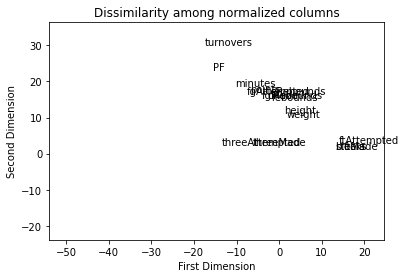

In [44]:
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = normCols
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among normalized columns')    
plt.show()

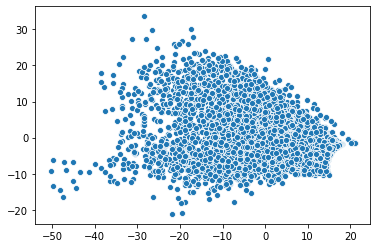

In [47]:
sns.scatterplot(x=mds_coords[:,0], y=mds_coords[:,1])

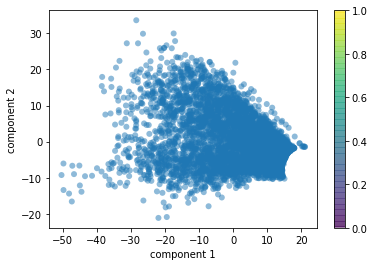

In [49]:
plt.scatter(mds_coords[:, 0], mds_coords[:, 1], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [55]:
from sklearn.mixture import GaussianMixture as GMM      # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(totalData[normCols])                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(totalData[normCols])        # 4. Determine cluster labels

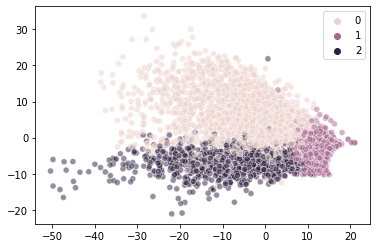

In [60]:
sns.scatterplot(x=mds_coords[:,0], y=mds_coords[:,1],alpha=0.5,hue=y_gmm)

In [61]:
#PCA related

In [62]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(totalData[normCols])                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(totalData[normCols])         # 4. Transform the data to two dimensions

In [68]:
#sns.lmplot(X_2D[:,0], X_2D[:,1], hue=y_gmm,data=X_2D, fit_reg=False)

In [71]:
totalData["PCA1"]=X_2D[:,0]
totalData["PCA2"]=X_2D[:,1]
totalData["group"]=y_gmm
totalData.head()

,playerID,name,pos,height,weight,GP,minutes,points,oRebounds,dRebounds,...,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,PCA1,PCA2,group
0,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,67,0.244209,0.903015,-0.458381,-0.485275,...,0.415934,1.566307,1.271621,-0.258836,-0.154580,0.198020,-0.086479,0.857378,-2.424253,0
1,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,81,0.279756,0.679236,-0.640292,-0.449556,...,0.174047,1.124356,0.922138,-0.186662,-0.061115,0.144321,0.078837,0.479428,-2.412439,0
2,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,81,1.542212,2.205200,-0.200674,0.136231,...,0.797862,2.638845,2.509137,0.708295,1.088504,1.066152,0.999880,4.246698,-3.461337,0
3,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,80,1.442034,1.957977,-0.564496,-0.099513,...,0.428665,2.293908,2.251321,0.686643,1.107197,0.493364,0.338618,3.297210,-3.101310,0
4,abdulma02,Mahmoud Abdul-Rauf,G,-1.442703,-1.842983,73,0.865742,1.378281,-0.488700,-0.356688,...,0.123123,1.555527,1.586730,0.159773,0.350131,1.227248,1.306894,2.081757,-3.506538,0


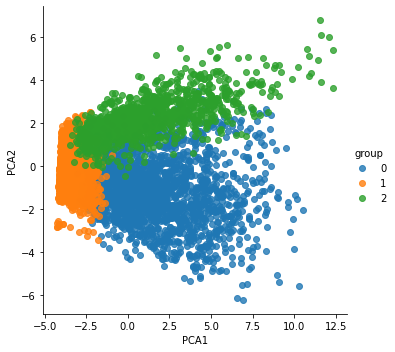

In [72]:
sns.lmplot("PCA1", "PCA2", hue="group",data=totalData, fit_reg=False)

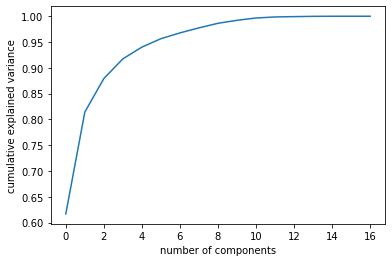

In [75]:
#choosing number of components in PCA #pareto chart for choosing the number of components
pca = PCA().fit(totalData[normCols])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');